# 手寫阿拉伯數字辨識 完整版

## 步驟1：載入 MNIST 手寫阿拉伯數字資料

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [3]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001111111111110000',
 '0000000011111111111111110000',
 '0000000111111111111111100000',
 '0000000111111111110000000000',
 '0000000011111110110000000000',
 '0000000001111100000000000000',
 '0000000000011110000000000000',
 '0000000000011110000000000000',
 '0000000000001111110000000000',
 '0000000000000111111000000000',
 '0000000000000011111100000000',
 '0000000000000001111100000000',
 '0000000000000000011110000000',
 '0000000000000011111110000000',
 '0000000000001111111100000000',
 '0000000000111111111000000000',
 '0000000011111111110000000000',
 '0000001111111111000000000000',
 '0000111111111100000000000000',
 '0000111111110000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

In [5]:
# 將非0的數字轉為1，顯示第2張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 0
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000001111100000000',
 '0000000000000011111100000000',
 '0000000000000111111111000000',
 '0000000000011111111111000000',
 '0000000000011111111111000000',
 '0000000000111111111111000000',
 '0000000001111111110011100000',
 '0000000011111100000011100000',
 '0000000111111100000011100000',
 '0000000111100000000011100000',
 '0000000111000000000011100000',
 '0000001111000000000011100000',
 '0000001111000000001111100000',
 '0000001110000000011111000000',
 '0000001110000000111100000000',
 '0000001110000001111000000000',
 '0000001111111111111000000000',
 '0000001111111111100000000000',
 '0000001111111110000000000000',
 '0000000111111100000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

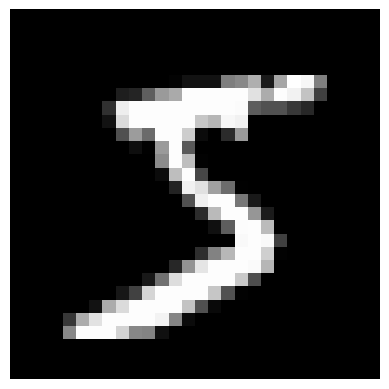

In [6]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

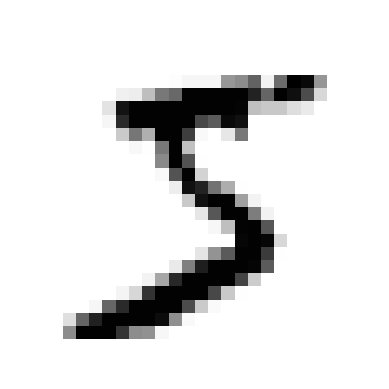

In [7]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='Greys')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

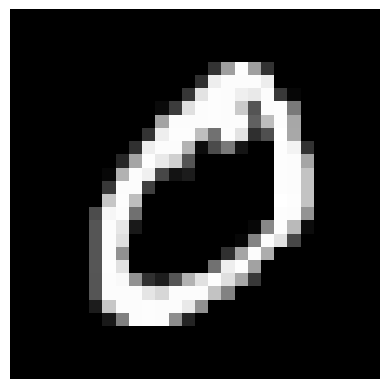

In [8]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[1,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

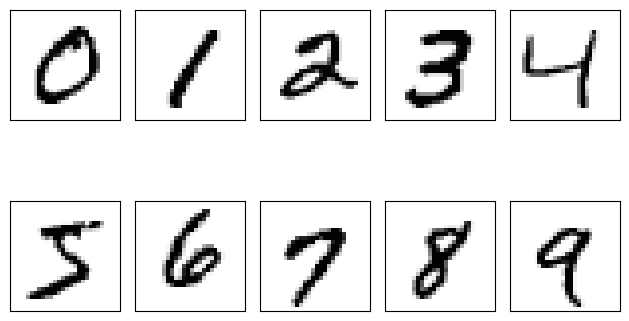

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

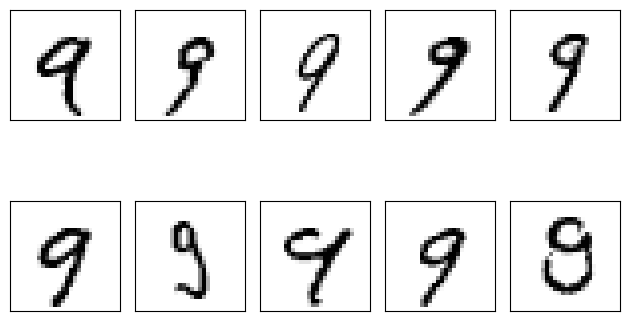

In [10]:
no=9
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [11]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [24]:
import numpy as np

y_train = np.where(y_train > 0, 1, 0)
y_test = np.where(y_test > 0, 1, 0)

In [14]:
np.unique(y_train)

array([0, 1])

In [18]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Input((28, 28)),
  tf.keras.layers.Flatten(),
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='sigmoid')
])

In [19]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #, tf.keras.metrics.CategoricalAccuracy()])

## 步驟6：結合訓練資料及模型，進行模型訓練

In [20]:
# 模型訓練
# callback: https://ithelp.ithome.com.tw/articles/10234641
# 自訂 callback: https://ithelp.ithome.com.tw/articles/10235293
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9805 - loss: 0.0572 - val_accuracy: 0.9947 - val_loss: 0.0179
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9961 - loss: 0.0138 - val_accuracy: 0.9967 - val_loss: 0.0108
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9976 - loss: 0.0079 - val_accuracy: 0.9974 - val_loss: 0.0087
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9977 - loss: 0.0062 - val_accuracy: 0.9972 - val_loss: 0.0082
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9985 - loss: 0.0051 - val_accuracy: 0.9973 - val_loss: 0.0096


In [21]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

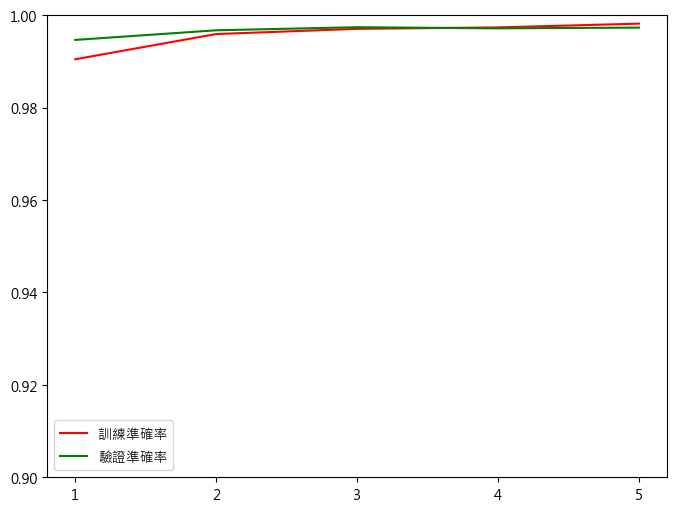

In [22]:
# 對訓練過程的準確率繪圖
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(range(1,6), history.history['accuracy'], 'r', label='訓練準確率')
plt.plot(range(1,6), history.history['val_accuracy'], 'g', label='驗證準確率')
plt.legend()
plt.ylim(0.9, 1)
plt.xticks(range(1,6));

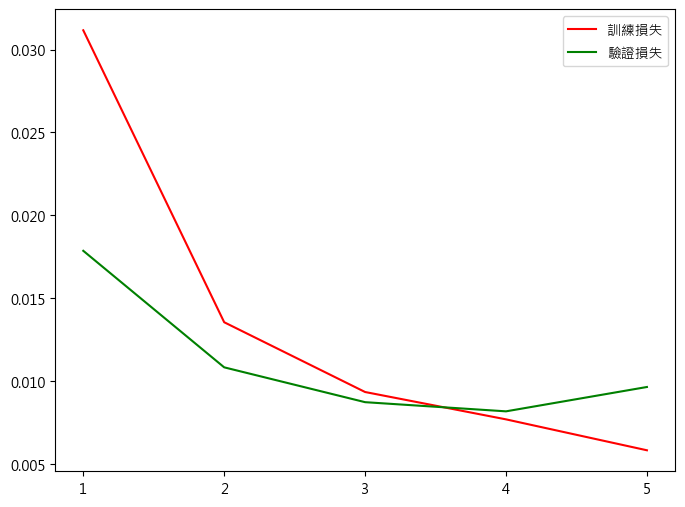

In [23]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1,6), history.history['loss'], 'r', label='訓練損失')
plt.plot(range(1,6), history.history['val_loss'], 'g', label='驗證損失')
plt.legend()
plt.xticks(range(1,6));

## 步驟7：評分(Score Model)

In [25]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.0116
compile_metrics: 0.9969


In [26]:
# 預測 1 筆資料
model.predict(x_test_norm[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[1.2925060e-05, 9.9995977e-01]], dtype=float32)

In [27]:
model.predict(x_test_norm).shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


(10000, 2)

In [28]:
import numpy as np

np.argmax(model.predict(x_test_norm), axis=-1), np.argmax(model.predict(x_test_norm), axis=-1).shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(array([1, 1, 1, ..., 1, 1, 1], dtype=int64), (10000,))

In [29]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print('actual    :', y_test[0:20])
print('prediction:', predictions[0:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
actual    : [1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1]
prediction: [1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1]


In [55]:
# 顯示第 9 筆的機率
import numpy as np

predictions = model.predict(x_test_norm[8:9])
print(f'0~9預測機率: {np.around(predictions, 2)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0~9預測機率: [[0.   0.   0.   0.   0.   0.69 0.31 0.   0.   0.  ]]


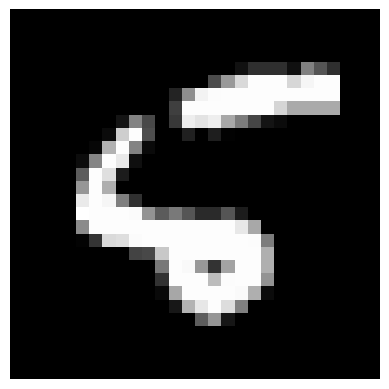

In [56]:
# 顯示第 9 筆圖像
X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

## 步驟8：評估，暫不進行

## 步驟9：模型佈署

In [57]:
# 模型存檔
model.save('model.h5')

# 模型載入
model = tf.keras.models.load_model('model.h5')

## 步驟10：新資料預測

In [31]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = './myDigits/9.png'
image1 = io.imread(uploaded_file, as_gray=True)
print(image1.shape)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1, 28, 28) #/ 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1-X1)

# 預測
#predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1, verbose=0), axis=-1)
print(predictions)

(280, 280)
[1]


In [32]:
model.predict(X1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.14894748, 0.8123807 ]], dtype=float32)

In [34]:
uploaded_file = './A.png'
image1 = io.imread(uploaded_file, as_gray=True)
print(image1.shape)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1, 28, 28) #/ 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1-X1)

# 預測
#predictions = model.predict_classes(X1)
predictions = model.predict(X1, verbose=0)
print(predictions)

(280, 280)
[[0.01730827 0.98709404]]


In [59]:
np.sum(model.predict(X1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


1.0000001

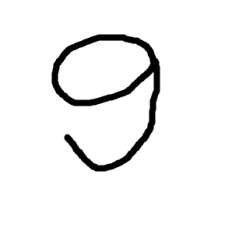

In [39]:
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(image1, cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

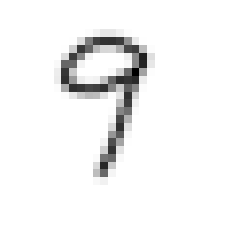

In [28]:
# 繪製點陣圖，cmap='gray':灰階
plt.imshow(image_resized, cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

In [60]:
# 讀取影像並轉為單色
for i in range(10):
    uploaded_file = f'./myDigits/{i}.png'
    image1 = io.imread(uploaded_file, as_gray=True)

    # 縮為 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1,28, 28) #/ 255

    # 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
    X1 = np.abs(1-X1)

    # 預測
    #predictions = model.predict_classes(X1)
    predictions = np.argmax(model.predict(X1, verbose=0), axis=-1)
    print(predictions)

[0]
[6]
[2]
[3]
[7]
[5]
[6]
[7]
[8]
[1]


In [29]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = './9.png'
image1 = io.imread(uploaded_file, as_gray=True)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28, 28) #/ 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1-X1)

# 預測
#predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1), axis=-1)
print(predictions)

[1]


## 其他：顯示模型彙總資訊(summary)、繪製圖形顯示模型結構

In [61]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [62]:
(784+1) * 128

100480

## 繪製模型
#### 需安裝 graphviz (https://www.graphviz.org/download/)
#### 將安裝路徑 C:\Program Files\GraphvizX.XX\bin 新增至環境變數 path 中
#### pip install graphviz pydotplus

In [64]:
!pip install graphviz pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/278.7 kB 330.3 kB/s eta 0:00:01
     ----- ------------------------------- 41.0/278.7 kB 326.8 kB/s eta 0:00:01
     ----- ------------------------------- 41.0/278.7 kB 326.8 kB/s eta 0:00:01
     --------------------- -------------- 163.8/278.7 kB 701.4 kB/s eta 0:00:01
     -------------------------- --------- 204.8/278.7 kB 734.2 kB/s eta 0:00:01
     ------------------------------- ---- 245.8/278.7 kB 793.0 kB/s eta 0:00:01
     ------------------------------------ 278.7/278.7 kB 780.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0

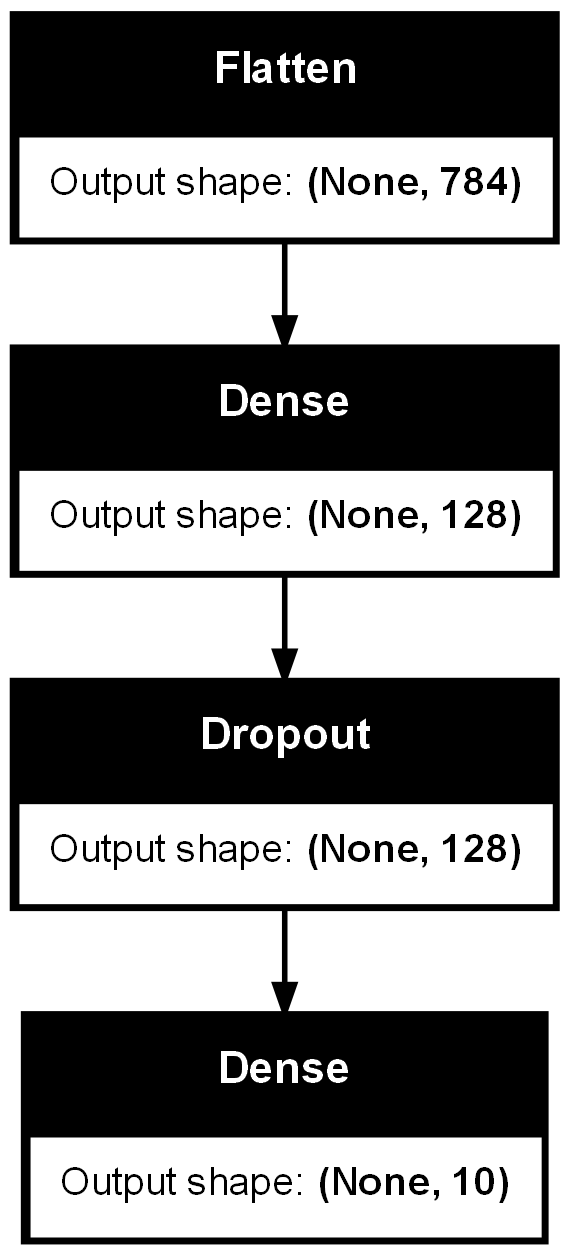

In [15]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [68]:
import pandas as pd 
predictions = np.argmax(model.predict(x_test_norm), axis=-1)
pd.crosstab(y_test, predictions, rownames=['實際值'], colnames=['預測值'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,970,0,2,1,1,1,2,1,1,1
1,0,1126,3,1,0,1,2,1,1,0
2,1,1,1017,2,0,0,4,3,4,0
3,0,0,5,988,0,10,0,4,3,0
4,1,0,2,1,965,0,4,0,2,7
5,2,1,0,6,0,870,6,0,4,3
6,4,2,0,1,2,3,946,0,0,0
7,1,5,13,5,1,0,0,997,1,5
8,3,0,5,4,2,2,2,5,949,2


In [69]:
import sklearn.metrics
sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=np.argmax(model.predict(x_test_norm), axis=-1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ 970,    0,    2,    1,    1,    1,    2,    1,    1,    1],
       [   0, 1126,    3,    1,    0,    1,    2,    1,    1,    0],
       [   1,    1, 1017,    2,    0,    0,    4,    3,    4,    0],
       [   0,    0,    5,  988,    0,   10,    0,    4,    3,    0],
       [   1,    0,    2,    1,  965,    0,    4,    0,    2,    7],
       [   2,    1,    0,    6,    0,  870,    6,    0,    4,    3],
       [   4,    2,    0,    1,    2,    3,  946,    0,    0,    0],
       [   1,    5,   13,    5,    1,    0,    0,  997,    1,    5],
       [   3,    0,    5,    4,    2,    2,    2,    5,  949,    2],
       [   3,    4,    1,    5,   11,    4,    0,    3,    4,  974]],
      dtype=int64)

In [70]:
model.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': 'float32',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
    

In [71]:
model.get_weights()

[array([[-0.0497115 , -0.07139549,  0.04614133, ..., -0.0526282 ,
         -0.03496595, -0.08002005],
        [-0.07020956, -0.04150481, -0.01421587, ..., -0.01135479,
          0.02487942, -0.06935536],
        [ 0.05545772,  0.01848819,  0.06594602, ...,  0.03916091,
         -0.00712036, -0.0529092 ],
        ...,
        [-0.00011306, -0.00020275,  0.02032185, ...,  0.02356937,
         -0.03701505, -0.03307812],
        [ 0.04858416,  0.07767462, -0.01799792, ..., -0.01521388,
          0.0156827 ,  0.02911008],
        [-0.0633151 ,  0.0149656 ,  0.00466546, ..., -0.0308151 ,
         -0.04356435, -0.03131362]], dtype=float32),
 array([-1.44063029e-02,  1.59170683e-02,  7.41694495e-02, -6.27473518e-02,
         9.03667957e-02,  9.93726104e-02,  2.03237429e-01,  1.39987487e-02,
        -8.99263471e-02, -1.16278030e-01,  2.67685745e-02, -1.00205385e-03,
        -1.56935155e-01, -1.64661095e-01, -6.10346086e-02, -3.11441068e-02,
         4.78882082e-02, -7.70440176e-02, -3.99789140e

In [73]:
model.get_layer(index=1).name

'dropout'

In [74]:
model.get_layer(index=3).get_weights()

[array([[ 0.29501837,  0.20305002,  0.18483025, ...,  0.2574454 ,
         -0.1764624 ,  0.14718777],
        [-0.83841306,  0.386149  , -0.13431947, ..., -0.3305388 ,
         -0.40232837,  0.3418763 ],
        [ 0.09954374, -0.28031296, -0.04398528, ..., -0.6061716 ,
         -0.40226668, -0.14025728],
        ...,
        [ 0.5565836 ,  0.18116973,  0.32967442, ...,  0.05845038,
         -1.0141073 ,  0.00672599],
        [ 0.22446421, -0.48739722,  0.16425738, ...,  0.14641309,
         -0.29417914,  0.21715474],
        [-0.29647002,  0.22581701, -0.53920525, ...,  0.10449959,
          0.23841256,  0.18511397]], dtype=float32),
 array([ 0.01039127, -0.04739278, -0.28252342, -0.17765431,  0.14472793,
        -0.06335416,  0.03302697, -0.12039851,  0.3461507 ,  0.05262271],
       dtype=float32)]

In [75]:
model.count_params()

101770